<h2><p style="text-align: center;">Sprint 5</p></h2>

---

## Project 5: `TikTok`

**Group 6:**   
Hamna Ashraf - 8826836\
John Alber - 8976716\
Simardeep Singh - 8976948

**Required Libraries:**

In [85]:
import pandas as pd
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import seaborn as sns

from nltk.tokenize import word_tokenize  
from nltk.corpus import stopwords
import string  
from nltk import pos_tag  
from nltk.corpus import wordnet  
from nltk.stem import WordNetLemmatizer  
import re  
import emoji
from textblob import TextBlob
from wordcloud import WordCloud

In [36]:
df_account = pd.read_csv("./tiktok_users/TikTok profiles dataset (Public web data).csv")
df_reviews = pd.read_csv("./tiktokAppReviews/tiktok_app_reviews.csv")

C:\Users\hamna\AppData\Local\Temp\ipykernel_7328\4160062381.py:2: DtypeWarning:

Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.



### Data Preprocessing:

In [37]:
df_account.head()

,timestamp,account_id,nickname,biography,awg_engagement_rate,comment_engagement_rate,like_engagement_rate,bio_link,is_verified,followers,following,likes,videos_count,create_time,id,top_videos,url,profile_pic_url
0,2023-08-01,a.r.m.y664,❤️❤️❤️,nazywam się Basia 🇵🇱+🇺🇸 moja mama jest z USA 🖤...,0.049630,0.004473,0.045157,NaN,False,1755,1443,1586,20,NaN,6794435137251820550,https://www.tiktok.com/@a.r.m.y664/video/68236...,https://www.tiktok.com/@a.r.m.y664,https://p77-sign-va.tiktokcdn.com/musically-ma...
1,2023-08-01,a2_9r,ايمن الفستقي🍺🥂🥃,حسابي الاصلي تيكتككك(_8_ytp_,0.059322,0.004358,0.054964,NaN,False,354,1422,3843,225,NaN,7019722709156430853,https://www.tiktok.com/@a2_9r/video/7218348887...,https://www.tiktok.com/@a2_9r,https://p16-sign-va.tiktokcdn.com/tos-maliva-a...
2,2023-07-30,ti.po.check,All,Активный пользователь ТикТока 🌝\nМеня зовут BD...,0.001399,0.000058,0.001341,NaN,False,1960,243,24000,228,NaN,6826677567140873222,https://www.tiktok.com/@ti.po.check/video/6984...,https://www.tiktok.com/@ti.po.check,https://p58-sign-sg.tiktokcdn.com/aweme/720x72...
3,2023-08-06,nutrifersanort,L.N Fernanda Sánchez,"Nutrióloga, educadora en diabetes.",0.469767,0.004651,0.465116,NaN,False,43,41,100,5,NaN,6809397670235407365,https://www.tiktok.com/@nutrifersanort/video/7...,https://www.tiktok.com/@nutrifersanort,https://p16-sign-va.tiktokcdn.com/tos-maliva-a...
4,2023-07-25,bhgdee,D💲,Ig-bhg.dee📸\nSc-dannieo2099 👻\nFb- frank matth...,0.122283,0.008152,0.114130,NaN,False,276,2262,126,4,NaN,6810526136080483334,https://www.tiktok.com/@bhgdee/video/719722663...,https://www.tiktok.com/@bhgdee,https://p16-sign.tiktokcdn-us.com/tos-useast5-...


In [38]:
print(df_account.isnull().sum())

timestamp                     0
account_id                    0
nickname                      0
biography                     3
awg_engagement_rate           0
comment_engagement_rate       0
like_engagement_rate          0
bio_link                    809
is_verified                   0
followers                     0
following                     0
likes                         0
videos_count                  0
create_time                1000
id                            0
top_videos                    0
url                           0
profile_pic_url               0
dtype: int64


In [39]:
df_account.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   timestamp                1000 non-null   object 
 1   account_id               1000 non-null   object 
 2   nickname                 1000 non-null   object 
 3   biography                997 non-null    object 
 4   awg_engagement_rate      1000 non-null   float64
 5   comment_engagement_rate  1000 non-null   float64
 6   like_engagement_rate     1000 non-null   float64
 7   bio_link                 191 non-null    object 
 8   is_verified              1000 non-null   bool   
 9   followers                1000 non-null   int64  
 10  following                1000 non-null   int64  
 11  likes                    1000 non-null   int64  
 12  videos_count             1000 non-null   int64  
 13  create_time              0 non-null      float64
 14  id                       

In [40]:
#it has no value against any user
df_account.drop('create_time', axis=1, inplace=True)

create_time column had all null values stored and had no data. Therefore, it is better to remove this column.

In [41]:
#Fill the null values
df_account['bio_link'] = df_account['bio_link'].fillna('No Link')

In [42]:
#Fill null values for biography with 'No Bio'
df_account['biography'] = df_account['biography'].fillna('No Bio')

In [60]:
print(df_account.isnull().sum())

timestamp                  0
account_id                 0
nickname                   0
biography                  0
awg_engagement_rate        0
comment_engagement_rate    0
like_engagement_rate       0
bio_link                   0
is_verified                0
followers                  0
following                  0
likes                      0
videos_count               0
id                         0
top_videos                 0
url                        0
profile_pic_url            0
dtype: int64


At the end, we are left with no null values in our data.

### Exploratory Data Analysis (EDA) User Accounts:

<Axes: xlabel='is_verified'>

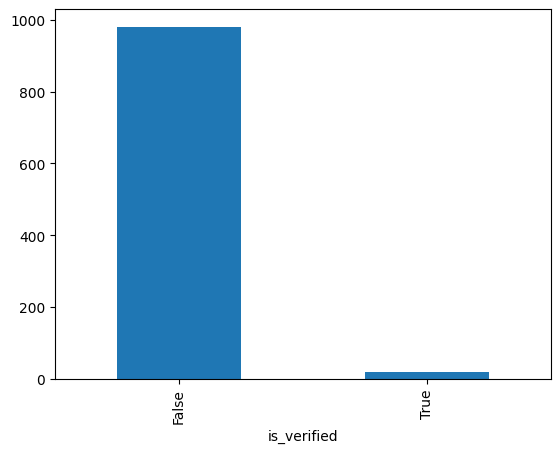

In [44]:
df_account['is_verified'].value_counts().plot(kind='bar')

Most accounts are not verified.

In [45]:
num_verified_accounts = df_account[df_account['is_verified'] == True]

print(f"Number of verified accounts: {num_verified_accounts.shape[0]}")

Number of verified accounts: 19


Out of 1000 user accounts, only 19 of them are verified accounts. 

In [46]:
verified_with_bio = num_verified_accounts[num_verified_accounts['bio_link'].notnull()].shape[0]
print(f"Number of verified accounts with a bio: {verified_with_bio}")
total_verified = num_verified_accounts.shape[0]

# Proportion of verified accounts with a bio
proportion_with_bio = verified_with_bio / total_verified

print(f"Proportion of verified accounts with a bio link: {proportion_with_bio:.2%}")


Number of verified accounts with a bio: 19
Proportion of verified accounts with a bio link: 100.00%


Most verified accounts have bio link given with the profile. 

In [47]:
print(f"Top 10 accounts with highest followers:")
top10_followers = df_account.sort_values(by='followers', ascending=False).head(10)
top10_followers


Top 10 accounts with highest followers:


,timestamp,account_id,nickname,biography,awg_engagement_rate,comment_engagement_rate,like_engagement_rate,bio_link,is_verified,followers,following,likes,videos_count,id,top_videos,url,profile_pic_url
759,2023-08-12,itsmenicksmithy2,Nick Smithyman 😎,YT: itsmenicksmithy\nBiz: NickSmithyMgmt@outlo...,0.008123,0.000065,0.008058,https://youtube.com/@itsmenicksmithygames,False,14500000,47,863500000,2333,6556639404252233733,https://www.tiktok.com/@itsmenicksmithy2/video...,https://www.tiktok.com/@undefined,https://p16-sign-va.tiktokcdn.com/musically-ma...
733,2023-07-30,diana_aster,💗 DIANA ASTER 💗,ЖДУ ТЕБЯ В ТЕЛЕГЕ 👇🏼💝\n\n ⠀,0.010912,0.000047,0.010866,https://t.me/dom2di,True,10500000,12,347000000,847,6575837798929235974,https://www.tiktok.com/@diana_aster/video/7260...,https://www.tiktok.com/@diana_aster,https://p16-sign-sg.tiktokcdn.com/aweme/720x72...
229,2023-08-11,lionsgate,Lionsgate,i’m real.,0.023546,0.000337,0.023210,https://www.joyride.movie/tickets,True,5400000,51,136800000,421,106956873395757056,https://www.tiktok.com/@lionsgate/video/726541...,https://www.tiktok.com/@undefined,https://p16-sign-va.tiktokcdn.com/musically-ma...
591,2023-08-11,mar.hacks,Mar,"Hi guys, Im ✨ Mar ✨\n📍Los Angeles\nContact: ma...",0.005879,0.000023,0.005857,No Link,True,4700000,335,74600000,861,6658308637847830534,https://www.tiktok.com/@mar.hacks/video/726579...,https://www.tiktok.com/@undefined,https://p19-sign.tiktokcdn-us.com/tos-useast5-...
757,2023-08-12,skylarrr_marie,Skylarr,🏳️‍⚧️\nBusinesses - Skylar@larissalynn.com\nCh...,0.009830,0.000095,0.009734,https://sky-mari.com/collections/chamoy-candy,False,3800000,242,141400000,2302,6684619859533317126,https://www.tiktok.com/@skylarrr_marie/video/7...,https://www.tiktok.com/@undefined,https://p19-sign.tiktokcdn-us.com/tos-useast5-...
811,2023-08-11,duki,dukoyasupiste,No Bio,0.511269,0.002052,0.509217,No Link,True,3000000,15,3000000,2,6999046748686353413,https://www.tiktok.com/@duki/video/72499871590...,https://www.tiktok.com/@undefined,https://p77-sign-va.tiktokcdn.com/musically-ma...
206,2023-08-11,katjakrasavice,KatjaKrasavice,EIN ❤️ FÜR BITCHES 01.09.2023,0.076421,0.001555,0.074866,https://youtu.be/0cKK2CDe8Yc,True,3000000,2,61700000,198,120772933278466048,https://www.tiktok.com/@katjakrasavice/video/7...,https://www.tiktok.com/@undefined,https://p77-sign-va-lite.tiktokcdn.com/tos-mal...
51,2023-08-11,lyllistapper,Lylli,yeet or be yeeted \n\na recipe for not good\n\...,0.018055,0.000046,0.018009,https://linktr.ee/lyllidc,False,2400000,570,82100000,300,6688172469582480389,https://www.tiktok.com/@lyllistapper/video/726...,https://www.tiktok.com/@undefined,https://p16-sign.tiktokcdn-us.com/tos-useast5-...
832,2023-08-11,thelanguageboy,the.language.boy,Entrepreneur | Language enthusiast | Follow me...,0.157202,0.001501,0.155701,No Link,False,2300000,4450,19700000,156,6681335391733892102,https://www.tiktok.com/@thelanguageboy/video/7...,https://www.tiktok.com/@undefined,https://p16-sign-va.tiktokcdn.com/tos-maliva-a...
554,2023-08-12,biteswithlily,biteswithlily,🤤 Living my best life through food 💗\n📍Based i...,0.160425,0.000568,0.159857,https://linktr.ee/Biteswithlily,False,2200000,300,78200000,310,6816310532486185989,https://www.tiktok.com/@biteswithlily/video/72...,https://www.tiktok.com/@undefined,https://p16-sign-sg.tiktokcdn.com/aweme/720x72...


In [48]:
print(f"Top 10 accounts with highest likes:")
top10_likes = df_account.sort_values(by='likes', ascending=False).head(10)
top10_likes

Top 10 accounts with highest likes:


,timestamp,account_id,nickname,biography,awg_engagement_rate,comment_engagement_rate,like_engagement_rate,bio_link,is_verified,followers,following,likes,videos_count,id,top_videos,url,profile_pic_url
759,2023-08-12,itsmenicksmithy2,Nick Smithyman 😎,YT: itsmenicksmithy\nBiz: NickSmithyMgmt@outlo...,0.008123,0.000065,0.008058,https://youtube.com/@itsmenicksmithygames,False,14500000,47,863500000,2333,6556639404252233733,https://www.tiktok.com/@itsmenicksmithy2/video...,https://www.tiktok.com/@undefined,https://p16-sign-va.tiktokcdn.com/musically-ma...
733,2023-07-30,diana_aster,💗 DIANA ASTER 💗,ЖДУ ТЕБЯ В ТЕЛЕГЕ 👇🏼💝\n\n ⠀,0.010912,0.000047,0.010866,https://t.me/dom2di,True,10500000,12,347000000,847,6575837798929235974,https://www.tiktok.com/@diana_aster/video/7260...,https://www.tiktok.com/@diana_aster,https://p16-sign-sg.tiktokcdn.com/aweme/720x72...
693,2023-08-12,brittany.scovel,Brittany Scovel 💋,Iowa 🏹\nIt might say 1.6 but I’m still good ol...,0.009780,0.000028,0.009752,https://hoo.be/brittany.scovel,False,1600000,835,160400000,5394,6652796370204819461,https://www.tiktok.com/@brittany.scovel/video/...,https://www.tiktok.com/@undefined,https://p16-sign.tiktokcdn-us.com/tos-useast5-...
757,2023-08-12,skylarrr_marie,Skylarr,🏳️‍⚧️\nBusinesses - Skylar@larissalynn.com\nCh...,0.009830,0.000095,0.009734,https://sky-mari.com/collections/chamoy-candy,False,3800000,242,141400000,2302,6684619859533317126,https://www.tiktok.com/@skylarrr_marie/video/7...,https://www.tiktok.com/@undefined,https://p19-sign.tiktokcdn-us.com/tos-useast5-...
229,2023-08-11,lionsgate,Lionsgate,i’m real.,0.023546,0.000337,0.023210,https://www.joyride.movie/tickets,True,5400000,51,136800000,421,106956873395757056,https://www.tiktok.com/@lionsgate/video/726541...,https://www.tiktok.com/@undefined,https://p16-sign-va.tiktokcdn.com/musically-ma...
12,2023-08-11,laurenwolfe,Lauren Wolfe,Hi besties\nnyc\n💕,0.080566,0.000160,0.080406,https://linktr.ee/_laurenwolfe_,True,1000000,786,92300000,1117,6718235424344687621,https://www.tiktok.com/@laurenwolfe/video/7265...,https://www.tiktok.com/@undefined,https://p16-sign.tiktokcdn-us.com/tos-useast5-...
51,2023-08-11,lyllistapper,Lylli,yeet or be yeeted \n\na recipe for not good\n\...,0.018055,0.000046,0.018009,https://linktr.ee/lyllidc,False,2400000,570,82100000,300,6688172469582480389,https://www.tiktok.com/@lyllistapper/video/726...,https://www.tiktok.com/@undefined,https://p16-sign.tiktokcdn-us.com/tos-useast5-...
554,2023-08-12,biteswithlily,biteswithlily,🤤 Living my best life through food 💗\n📍Based i...,0.160425,0.000568,0.159857,https://linktr.ee/Biteswithlily,False,2200000,300,78200000,310,6816310532486185989,https://www.tiktok.com/@biteswithlily/video/72...,https://www.tiktok.com/@undefined,https://p16-sign-sg.tiktokcdn.com/aweme/720x72...
591,2023-08-11,mar.hacks,Mar,"Hi guys, Im ✨ Mar ✨\n📍Los Angeles\nContact: ma...",0.005879,0.000023,0.005857,No Link,True,4700000,335,74600000,861,6658308637847830534,https://www.tiktok.com/@mar.hacks/video/726579...,https://www.tiktok.com/@undefined,https://p19-sign.tiktokcdn-us.com/tos-useast5-...
863,2023-08-11,solsenpai,sol.senpai,"Si lees esto formas parte de la secta, obedece...",0.028145,0.000237,0.027908,https://youtu.be/RU90DQJYs5Q,False,1900000,141,74000000,515,6779266614002254853,https://www.tiktok.com/@solsenpai/video/726585...,https://www.tiktok.com/@undefined,https://p16-sign-va.tiktokcdn.com/tos-maliva-a...


In [49]:
common_accounts = top10_likes.index.intersection(top10_followers.index)

# Get the details of the common accounts
common_top_accounts = df_account.loc[common_accounts]

print("Accounts with most number of likes and followers:")
common_top_accounts

Accounts with most number of likes and followers:


,timestamp,account_id,nickname,biography,awg_engagement_rate,comment_engagement_rate,like_engagement_rate,bio_link,is_verified,followers,following,likes,videos_count,id,top_videos,url,profile_pic_url
759,2023-08-12,itsmenicksmithy2,Nick Smithyman 😎,YT: itsmenicksmithy\nBiz: NickSmithyMgmt@outlo...,0.008123,0.000065,0.008058,https://youtube.com/@itsmenicksmithygames,False,14500000,47,863500000,2333,6556639404252233733,https://www.tiktok.com/@itsmenicksmithy2/video...,https://www.tiktok.com/@undefined,https://p16-sign-va.tiktokcdn.com/musically-ma...
733,2023-07-30,diana_aster,💗 DIANA ASTER 💗,ЖДУ ТЕБЯ В ТЕЛЕГЕ 👇🏼💝\n\n ⠀,0.010912,0.000047,0.010866,https://t.me/dom2di,True,10500000,12,347000000,847,6575837798929235974,https://www.tiktok.com/@diana_aster/video/7260...,https://www.tiktok.com/@diana_aster,https://p16-sign-sg.tiktokcdn.com/aweme/720x72...
757,2023-08-12,skylarrr_marie,Skylarr,🏳️‍⚧️\nBusinesses - Skylar@larissalynn.com\nCh...,0.009830,0.000095,0.009734,https://sky-mari.com/collections/chamoy-candy,False,3800000,242,141400000,2302,6684619859533317126,https://www.tiktok.com/@skylarrr_marie/video/7...,https://www.tiktok.com/@undefined,https://p19-sign.tiktokcdn-us.com/tos-useast5-...
229,2023-08-11,lionsgate,Lionsgate,i’m real.,0.023546,0.000337,0.023210,https://www.joyride.movie/tickets,True,5400000,51,136800000,421,106956873395757056,https://www.tiktok.com/@lionsgate/video/726541...,https://www.tiktok.com/@undefined,https://p16-sign-va.tiktokcdn.com/musically-ma...
51,2023-08-11,lyllistapper,Lylli,yeet or be yeeted \n\na recipe for not good\n\...,0.018055,0.000046,0.018009,https://linktr.ee/lyllidc,False,2400000,570,82100000,300,6688172469582480389,https://www.tiktok.com/@lyllistapper/video/726...,https://www.tiktok.com/@undefined,https://p16-sign.tiktokcdn-us.com/tos-useast5-...
554,2023-08-12,biteswithlily,biteswithlily,🤤 Living my best life through food 💗\n📍Based i...,0.160425,0.000568,0.159857,https://linktr.ee/Biteswithlily,False,2200000,300,78200000,310,6816310532486185989,https://www.tiktok.com/@biteswithlily/video/72...,https://www.tiktok.com/@undefined,https://p16-sign-sg.tiktokcdn.com/aweme/720x72...
591,2023-08-11,mar.hacks,Mar,"Hi guys, Im ✨ Mar ✨\n📍Los Angeles\nContact: ma...",0.005879,0.000023,0.005857,No Link,True,4700000,335,74600000,861,6658308637847830534,https://www.tiktok.com/@mar.hacks/video/726579...,https://www.tiktok.com/@undefined,https://p19-sign.tiktokcdn-us.com/tos-useast5-...


These 7 users are among the top 10 accounts with the highest number of likes and followers.\
It is important to notice that most accounts with highest followers also have most likes on their videos on TikTok.

In [50]:
common_top_users = top10_likes.merge(top10_followers, on='account_id')
top_users = common_top_users[['account_id', 'likes_x', 'followers_x', 'videos_count_x']]
top_users.columns = ['account_id', 'likes', 'followers', 'videos_count']

In [51]:
fig = go.Figure(data=[go.Pie(
    labels= top_users['account_id'],
    values= top_users['followers'],  # You can choose followers, likes, or another metric here
    hovertext=['Followers: {}<br>Likes: {}<br>Videos: {}'.format(f, l, v) for f, l, v in zip(top_users['followers'], top_users['likes'], top_users['videos_count'])],
    hoverinfo='label+text'
)])

fig.update_layout(
    title='Top Users by Followers and Likes',
)

fig.show()


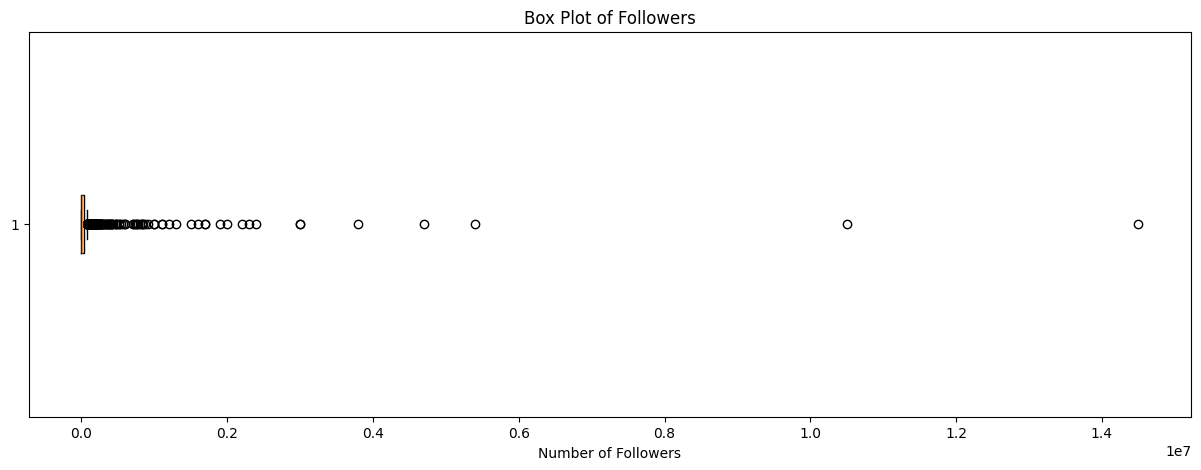

In [52]:
plt.figure(figsize=(15, 5))
plt.boxplot(df_account['followers'], vert=False)
plt.title('Box Plot of Followers')
plt.xlabel('Number of Followers')
plt.show()

The outliers, represented by individual points, show a few accounts with a much higher number of followers than the rest of the dataset. This is typical for social media platforms like TikTok where a few accounts often have a disproportionately large following.

In [53]:
max_videos_index = df_account['videos_count'].idxmax()

# Get the row with the highest number of videos
user_with_most_videos = df_account.loc[max_videos_index]

print("Details of user with the highest number of videos:\n")
print(user_with_most_videos)

Details of user with the highest number of videos:

timestamp                                                         2023-08-12
account_id                                                   brittany.scovel
nickname                                                   Brittany Scovel 💋
biography                  Iowa 🏹\nIt might say 1.6 but I’m still good ol...
awg_engagement_rate                                                  0.00978
comment_engagement_rate                                             0.000028
like_engagement_rate                                                0.009752
bio_link                                      https://hoo.be/brittany.scovel
is_verified                                                            False
followers                                                            1600000
following                                                                835
likes                                                              160400000
videos_count            

The given user has most video count on TikTok with 1.6M followers and 160M likes.

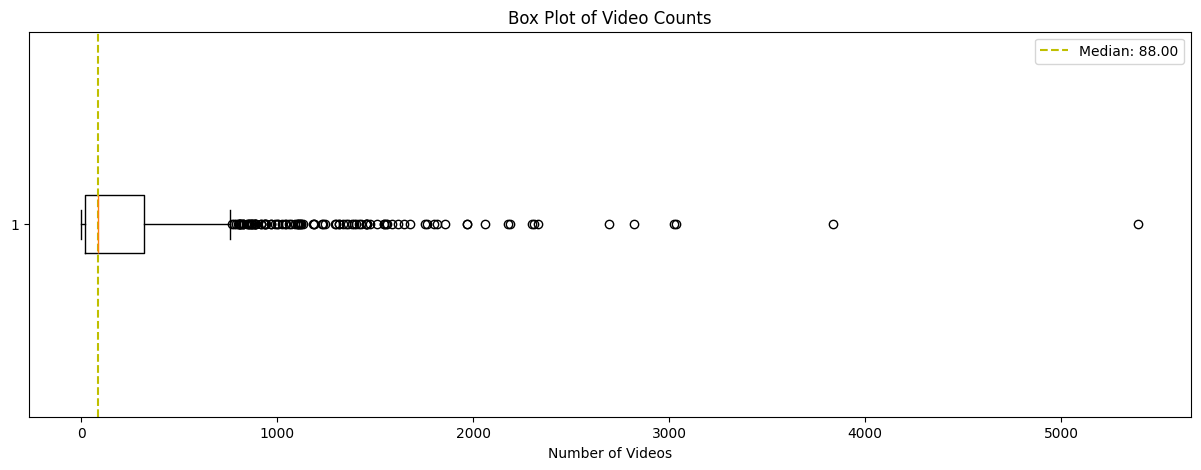

In [54]:
plt.figure(figsize=(15,5))
plt.boxplot(df_account['videos_count'], vert=False)
plt.title('Box Plot of Video Counts')
plt.xlabel('Number of Videos')

video_count_median = df_account['videos_count'].median()
plt.axvline(video_count_median, color='y', linestyle='--', label=f'Median: {video_count_median:.2f}')
plt.legend()
plt.show()

On average, each user has almost 88 videos on TikTok.

In [55]:
df_temp = df_account.copy()

df_temp.drop('timestamp', axis=1, inplace=True)
df_temp.drop('account_id', axis=1, inplace=True)
df_temp.drop('nickname', axis=1, inplace=True)
df_temp.drop('id', axis=1, inplace=True)



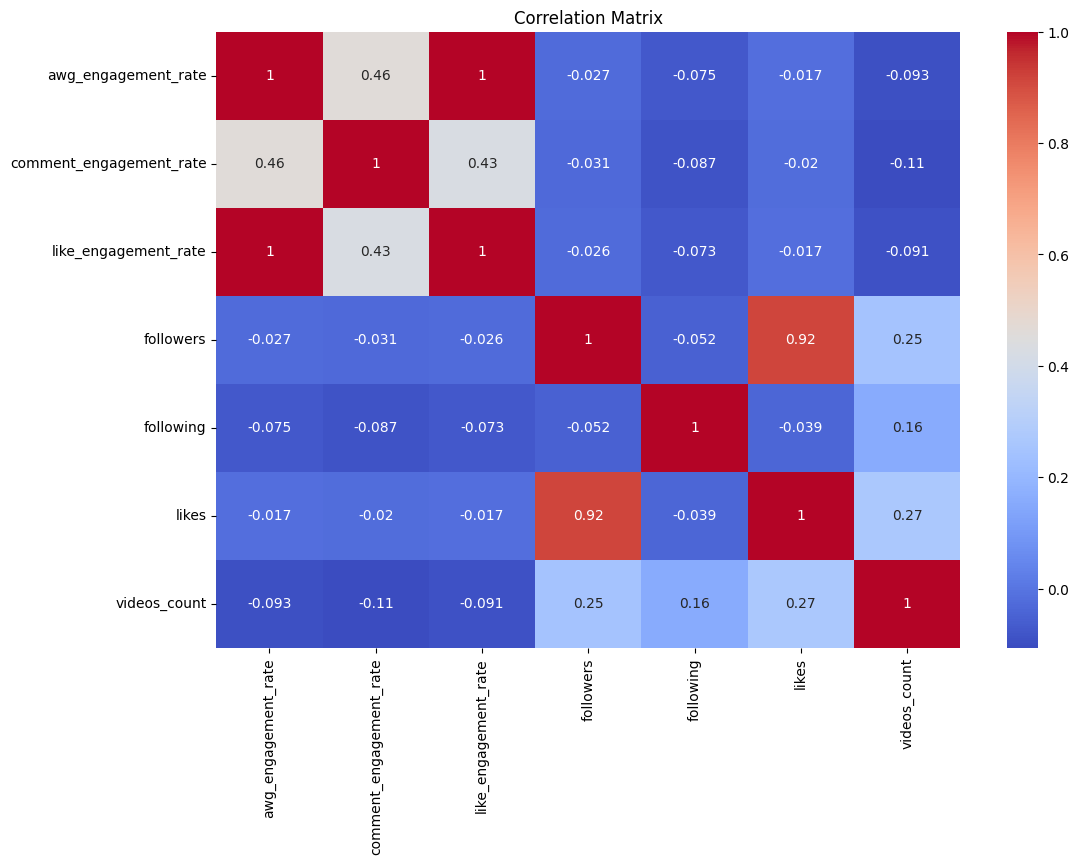

In [56]:
numeric_cols = df_temp.select_dtypes(include=['float64', 'int64']).columns

correlation_matrix = df_temp[numeric_cols].corr()

# Plot the correlation matrix heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

We can see that there is a strong positive co-relation between likes and followers. More the followers, more likes there.

### EDA Reviews:

In [57]:
df_reviews.head()

,review_id,review_text,upvotes,app_version,posted_date
0,gp:AOqpTOGSsGv5rOA79ttW2LE0FeMYvkdUuXRMTfbyMk0...,It is an excellent solution to finding videos ...,402,21.2.5,2021-09-20 07:50:23
1,gp:AOqpTOEDQ9__FJihY_0V4iwqy4P2OK8tGVR1tFBixYb...,Great app works really well so many features s...,67,21.2.5,2021-09-19 23:10:47
2,gp:AOqpTOEGEfr8TL0iKTlpbTDeM8P7HywlMmP9CkHMoaT...,I down loaded app but didnt work . i love this...,24,21.2.5,2021-09-19 08:59:34
3,gp:AOqpTOGZBDl9dpghmb43Mx1tnlWCOjNXyuVn5Mxf49c...,IT A GREAT APP AND FUN TO USE! HOWEVER ARBITRA...,18,21.2.5,2021-09-19 16:34:43
4,gp:AOqpTOFioH3wud_JnC4aPCG4p7s5DEEN2yZAWNXdRJj...,Currently it's working good for me except a fe...,232,21.1.41,2021-09-14 06:35:02


In [58]:
df_reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3646476 entries, 0 to 3646475
Data columns (total 5 columns):
 #   Column       Dtype 
---  ------       ----- 
 0   review_id    object
 1   review_text  object
 2   upvotes      int64 
 3   app_version  object
 4   posted_date  object
dtypes: int64(1), object(4)
memory usage: 139.1+ MB


In [59]:
print(df_reviews.isnull().sum())

review_id           0
review_text       163
upvotes             0
app_version    993269
posted_date         0
dtype: int64


In [65]:
def preprocess(data):

    """
    Preprocesses text data by performing tokenization, lowercasing, stopword removal,
    part-of-speech tagging, lemmatization, hashtag removal, emoji removal, special character removal, 
    and extra whitespace removal.
    
    Args:
    - data: Input text data to be preprocessed
    
    Returns:
    - cleaned_text: Preprocessed text data
    """
    
    #1. Tokenization:
    tokenize = word_tokenize(data)

    #2. Lowercasing:
    chars = set(string.punctuation)
    norm_token = [token for token in tokenize if token.lower() not in chars]
    
    #3. Stopwords Removal:
    stop_words = set(stopwords.words('english'))
    new_token = [token for token in norm_token if token.lower() not in stop_words]

    #4. Consider POS tagging 
    pos_tagging = pos_tag(new_token)

    #5. Lemmatization:
    lemmatizor = WordNetLemmatizer()
    token_list = []

    for word, tag in pos_tagging:
        if tag.startswith('N'): #NN,NNS,NNP,NNPS tags
            pos_word = wordnet.NOUN
        elif tag.startswith('V'): #VB, VBD, VBG, VBN, VBP tags
            pos_word = wordnet.VERB
        elif tag.startswith('J'): #JJ, JJR, JJS tags
            pos_word = wordnet.ADJ
        elif tag.startswith('R'): # RB, RBR, RBS tags
            pos_word = wordnet.ADV
        else:
            pos_word = wordnet.NOUN

        lemmatization = lemmatizor.lemmatize(word, pos_word)
        token_list.append(lemmatization)

    
    #6. Remove hashtags:
    text = ' '.join(token_list)
    text_without_hashtags = re.sub(r'\s?#\w+\b', '', text)

    #7. Emoji removal:
    text_without_emojis = emoji.replace_emoji(text_without_hashtags, replace='')
    cleaned_text = re.sub(r'\s+', ' ', text_without_emojis).strip()
    
    # 8. Remove special characters:
    cleaned_text = re.sub(r'[^\w\s]', '', text_without_emojis)
    
    # 9. Remove extra whitespaces:
    cleaned_text = re.sub(r'\s+', ' ', cleaned_text).strip()

    return cleaned_text
    

As the dataset is too large, so for implementation, I'll take a sample (10% of the data).

In [67]:
df_reviews_new = df_reviews.sample(frac=0.1)

In [68]:
df_reviews_new["review_text"] = df_reviews_new["review_text"].transform(lambda x: preprocess(str(x)))

In [70]:
def sentiment(x):
    return TextBlob(x).sentiment.polarity

def check_sentiment(x):
    if x < 0:
        return 'Negative'
    
    if x > 0:
        return 'Positive'
    
    else:
        return 'Neutral'
    
df_reviews_new['sentiment'] = df_reviews_new['review_text'].apply(lambda x: sentiment(str(x)))
df_reviews_new['sentiment'] = df_reviews_new['sentiment'].apply(check_sentiment)



In [71]:
df_reviews_new

,review_id,review_text,upvotes,app_version,posted_date,sentiment
2445423,gp:AOqpTOEqd-FSTYhenIw9KzBvROtnHWEgYedNrYj034J...,Superb,0,13.9.3,2019-12-11 09:23:53,Positive
2703232,gp:AOqpTOFCt8Y3f8D7JQdQDkrJDO7EEJM-wZGVPODfzZ9...,ok okkkkkj,0,10.1.10,2019-03-10 23:25:39,Positive
1499642,gp:AOqpTOHWs6SIWDUk3a9LsXcpS7-V0nRtvE81prilX4-...,Please live open,0,NaN,2020-06-17 18:54:48,Positive
3570399,gp:AOqpTOHyBQNc3SRdW4ElkYGXQD5MP5XvygB7BQ_t-IN...,Prashanth,0,NaN,2020-07-09 15:36:15,Neutral
871547,gp:AOqpTOFqoRq4C2BlcMdpVm9v0JQYu6KvpJqkTj3fFOQ...,nice app,0,NaN,2019-03-03 18:36:09,Positive
...,...,...,...,...,...,...
2016105,gp:AOqpTOHezDoKO7Hx0B-KoHGVHTqDQudc45YdVeA7cK3...,Amazing,0,16.7.3,2020-07-01 22:22:57,Positive
2816732,gp:AOqpTOEIPvOg06JgdAsVWPBxagpFYfwHhGNlOL8SME8...,like,0,8.6.0,2018-10-17 07:31:11,Neutral
1830892,gp:AOqpTOHvUbbnZjWoIMLs6FkLwCAvUTB34STaOx7BDUS...,Love,0,18.3.6,2021-01-15 12:08:57,Positive
2814719,gp:AOqpTOFpikAAOBlo6Dw8cOl6ZNIBpvaWGacrO4ieS_y...,bad,0,8.7.0,2019-04-02 11:41:17,Negative


In [72]:
sentiment_counts = df_reviews_new['sentiment'].value_counts()

In [83]:
#(Sample taken 360k Reviews)

colors = {
    'Positive': 'Green',
    'Neutral': 'Blue',
    'Negative': 'Red'
}

fig = go.Figure(data=[go.Pie(
    labels=sentiment_counts.index,
    values=sentiment_counts.values,
    textinfo='percent', 
    hoverinfo='label+value+percent',  
    marker=dict(colors=[colors[sentiment] for sentiment in sentiment_counts.index])
)])

fig.update_layout(
    title='Sentiment for Reviews'
)

fig.show()

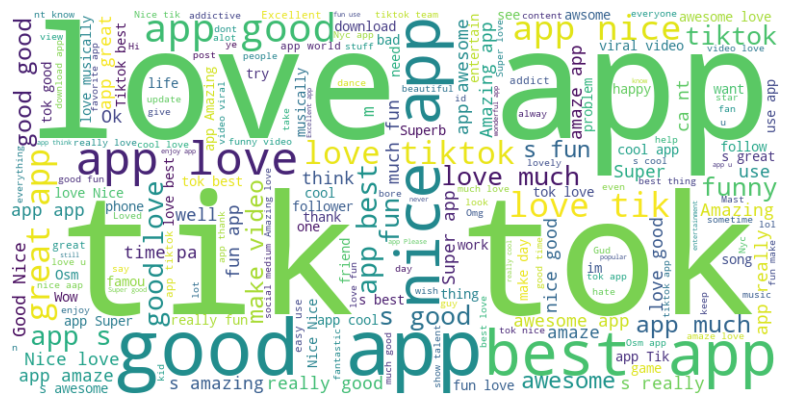

In [84]:
text = ' '.join(df_reviews_new['review_text'].dropna())
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

This wordcloud shows visual summary of the most common words in your text data, highlighting positive sentiments and frequent discussions about the TikTok app. This can be useful for understanding general user feedback, sentiment, and common themes in the text data without delving into detailed textual analysis.